# Plot the incidences
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.
The following code creates multiple plots out of the data to give a rough overview of the possibilities.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# to calculate squarerott and scale incidences
import math
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
plot_incidences_directory = os.getcwd()
# to print bold in math mode latex
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

C:\Users\leand\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  


## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(plot_incidences_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## Plots


### Number of Seven Days Incidences
Plots all seven days incidences of all days availlable.<br/>
Is used to get a feeling of how many incidences are above certain thresholds and which ranges contain solid data and which are statistical noise.
<br/><br/>
In the first cell below, the user can set the range of plotted incidences and multiple horizontal lines which help the user to more easily read the data.

In [3]:
range_of_incidences = (350, 100000)    # the seven days incidence cannot get above 100,000
draw_horizontal_line_in_plot_at_position = [400, 500, 600]

In [4]:
incidences_in_range = list()
for countys_series_of_incidences in [county['incidences'] for county in covid19.values()]:
    for incidence in countys_series_of_incidences:
        if incidence > range_of_incidences[0] and incidence < range_of_incidences[1]:
            incidences_in_range.append(incidence)
incidences_in_range.sort()

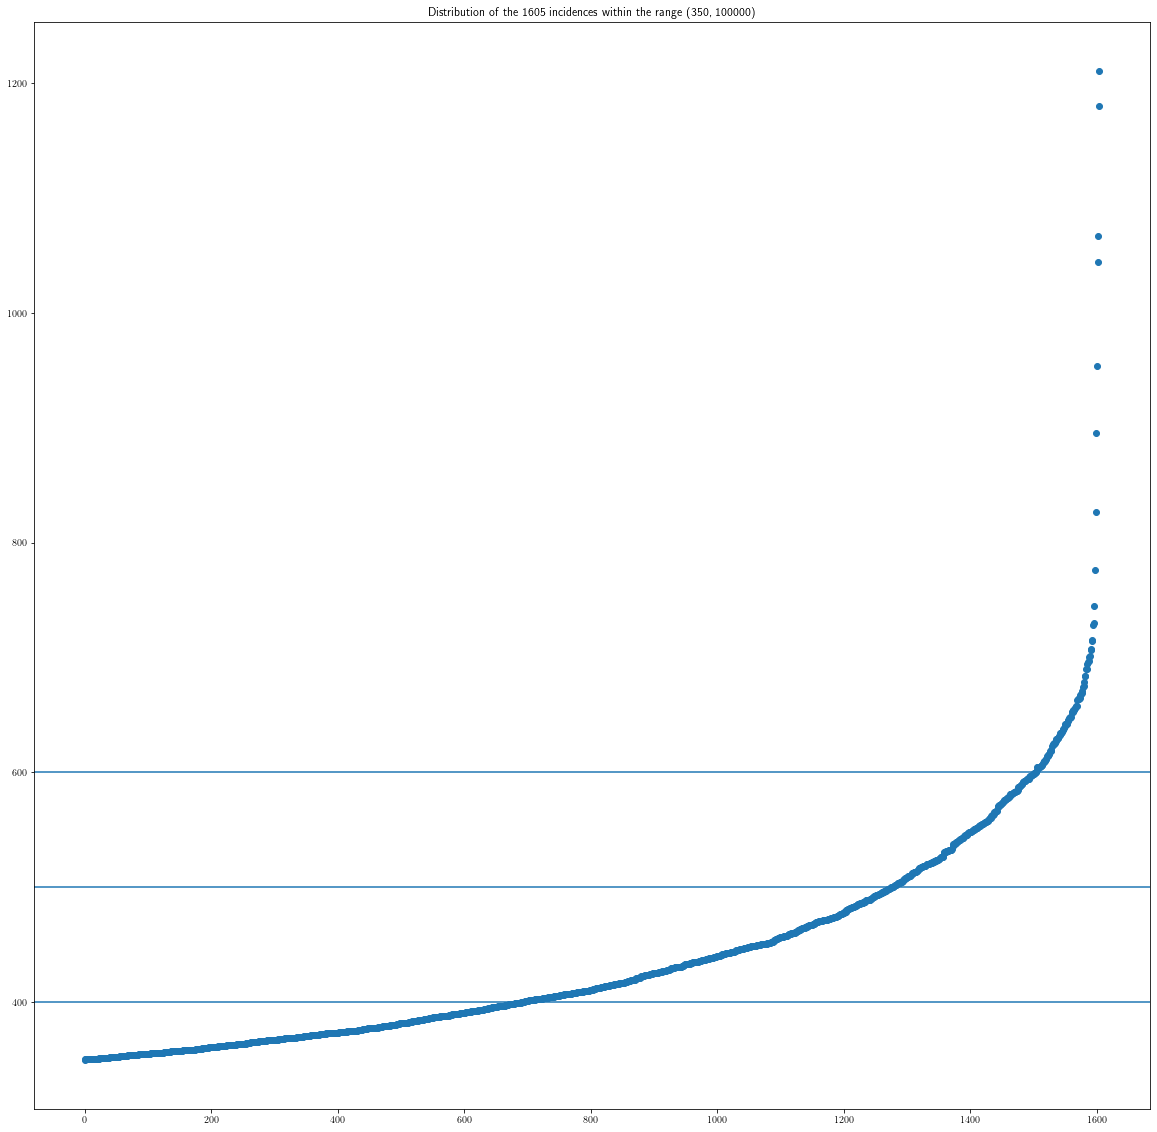

In [5]:
plt.figure(figsize=(20, 20))    # initiate and enlarge plot
for yvalue in draw_horizontal_line_in_plot_at_position:
    plt.axhline(yvalue)
plt.title("Distribution of the {} incidences within the range {}".format(
           len(incidences_in_range), range_of_incidences))
plt.scatter([e for e in range(len(incidences_in_range))], incidences_in_range)
plt.show()

### Incidences Sorted by Federal States
The series of the seven days incidence of every county are plotted into 16 plots: Sorted by the federal state the county is located in.
<br/><br/>
This process is also used to check that every county is related to one federal state:<br/>
The AdmUnitIDs of the counties (Gemeindeschlüssel) are copied to "covid19_copy".
The AdmUnitID of every county found with the state identifier is removed from the "covid19_copy". If any AdmUnitIDs remain in the end, an alert is triggered.

In [6]:
firsts_of_month_UTC = list()
firsts_of_month_unixtime = list()
for date_index in range(len(non_county_specific_data['UTC'])):
    if non_county_specific_data['UTC'][date_index][:3] == "01.":
        firsts_of_month_UTC.append(non_county_specific_data['UTC'][date_index][:6]+"\n"+
            non_county_specific_data['UTC'][date_index][6:])
        firsts_of_month_unixtime.append(non_county_specific_data['unixtime'][date_index])

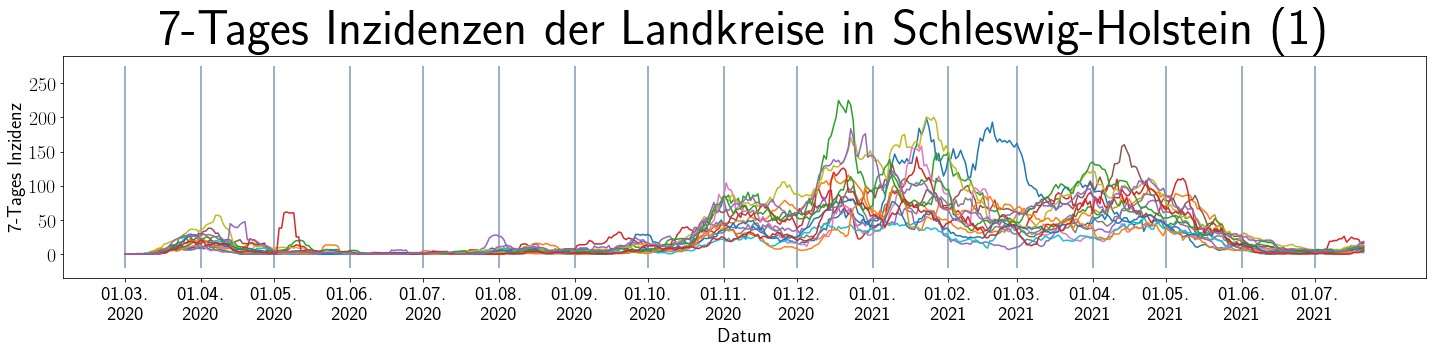

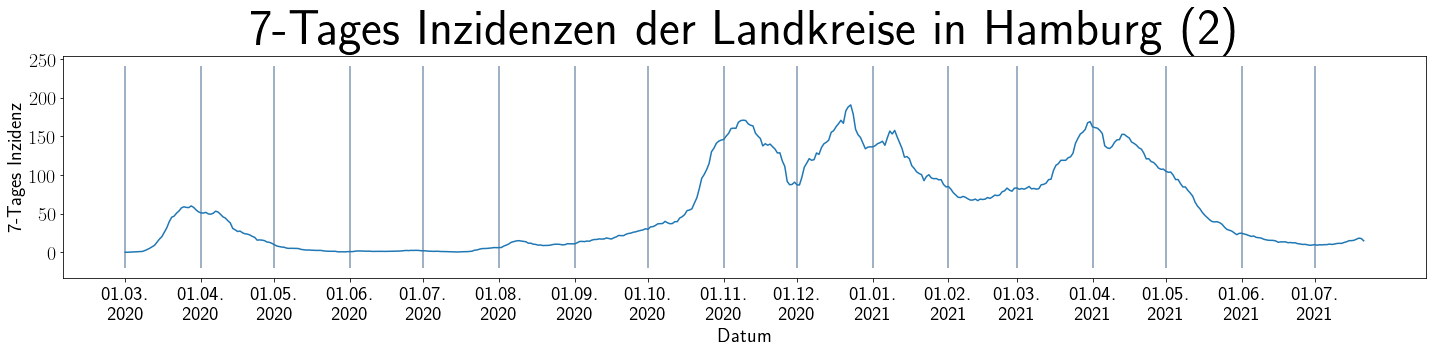

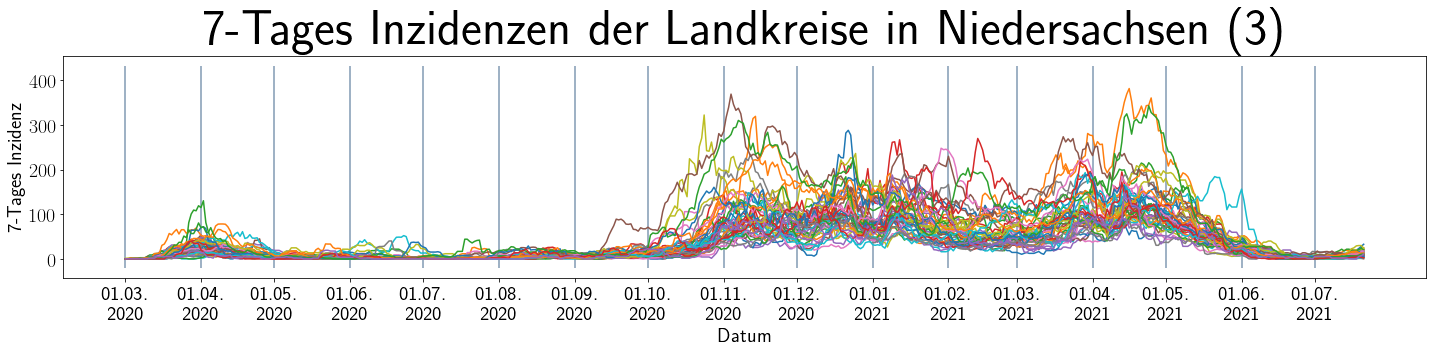

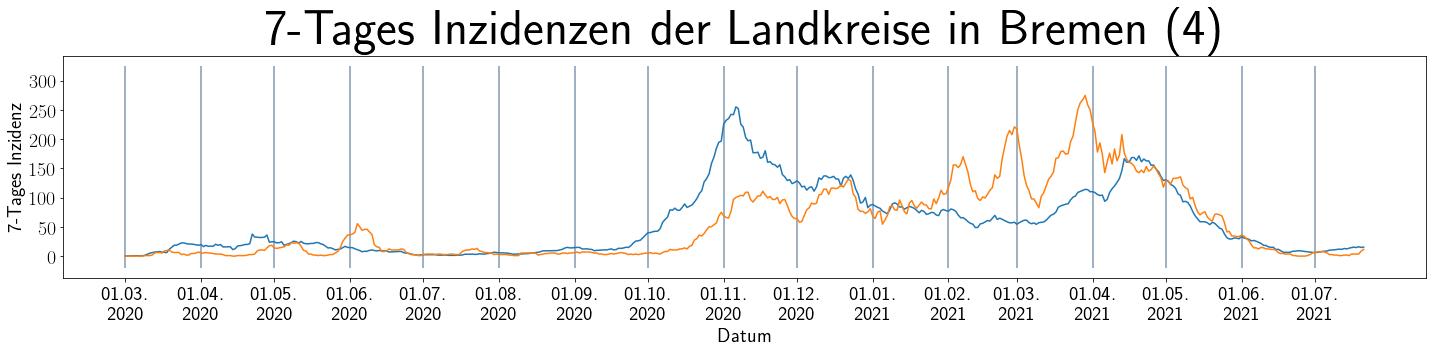

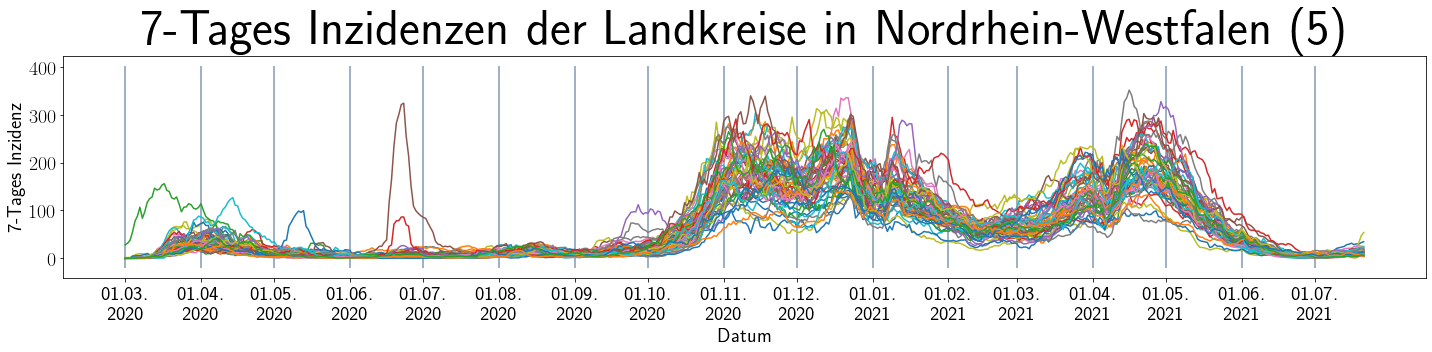

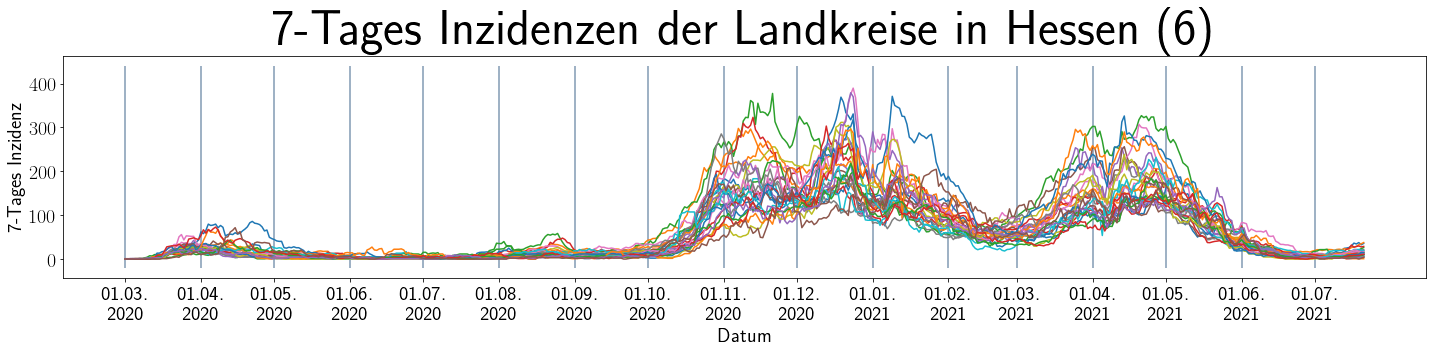

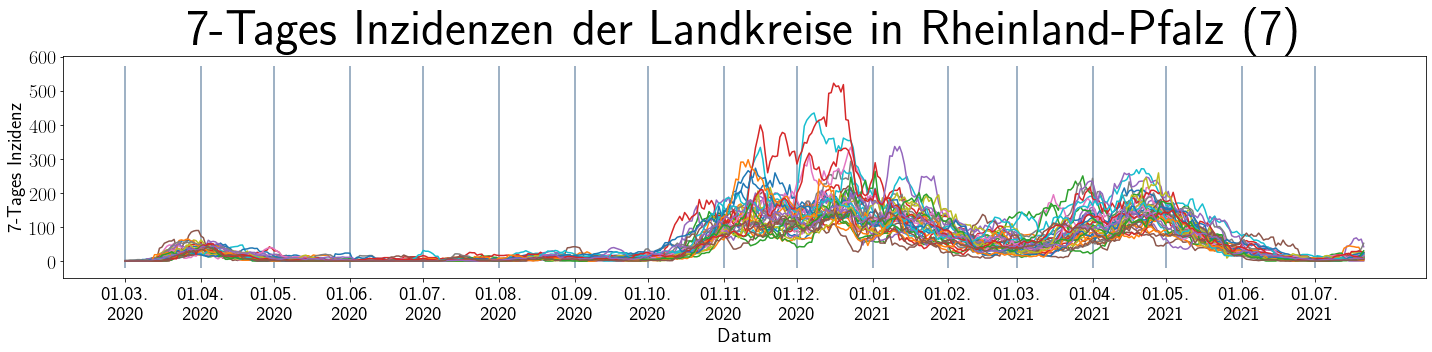

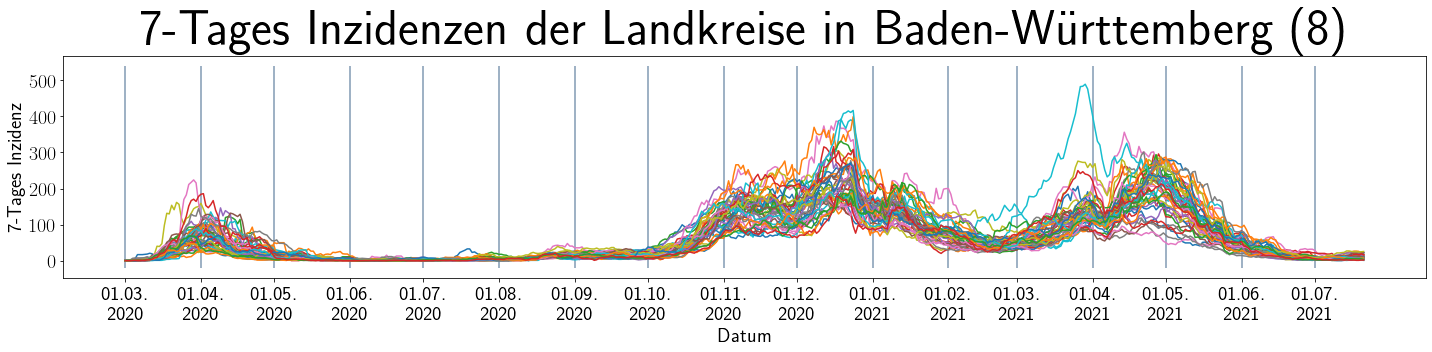

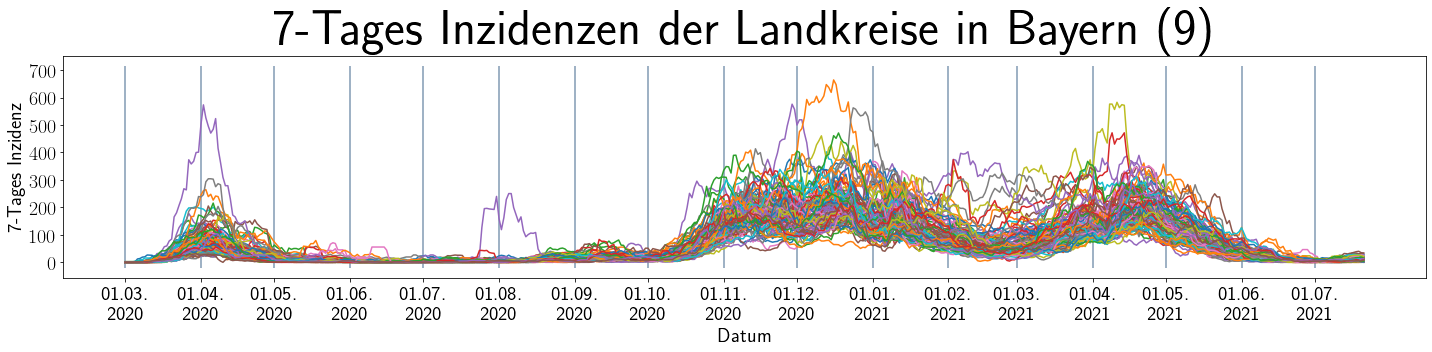

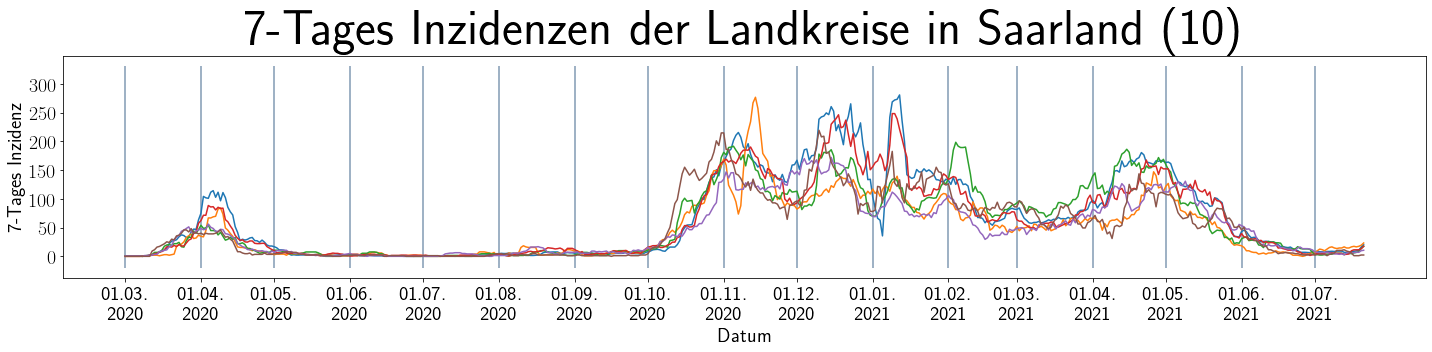

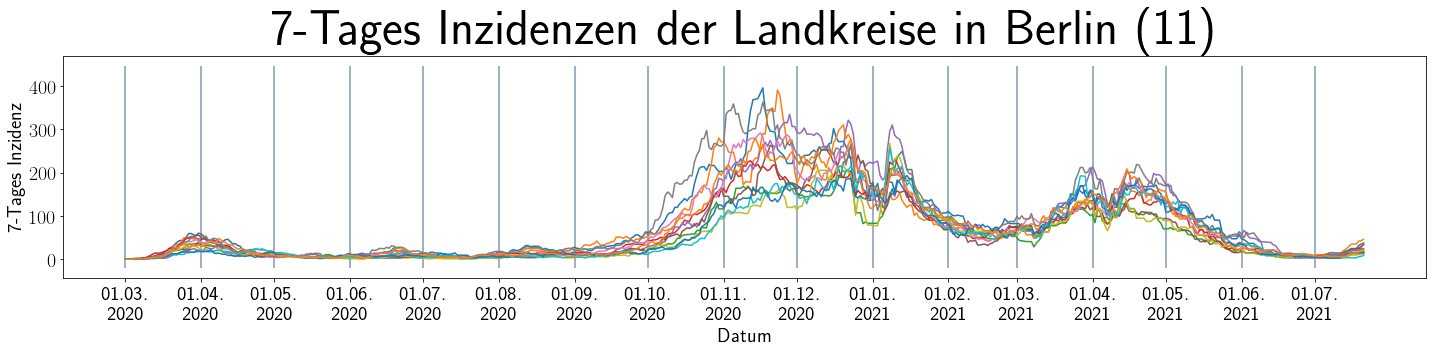

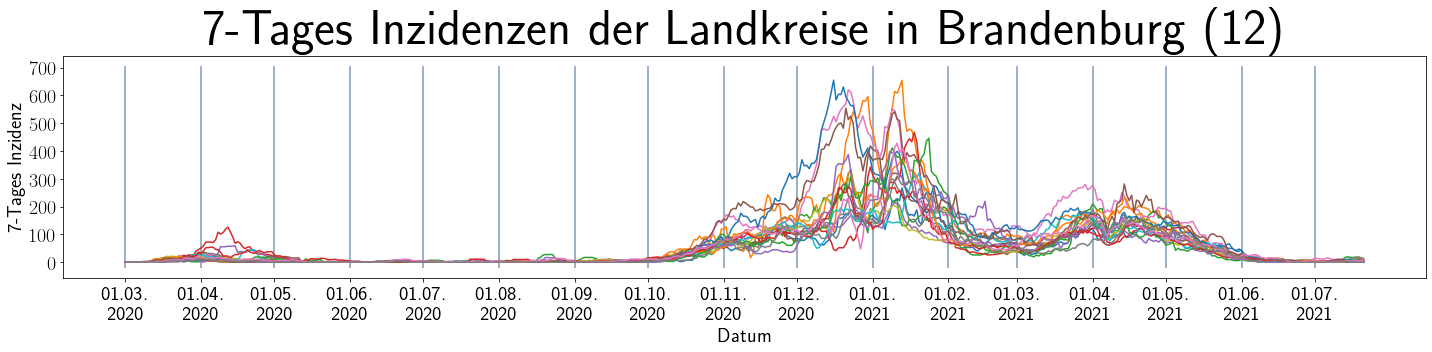

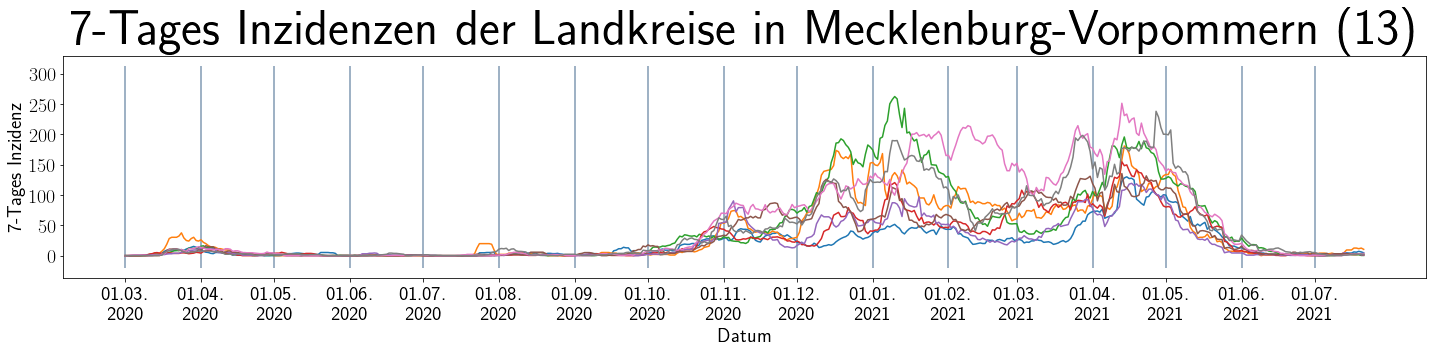

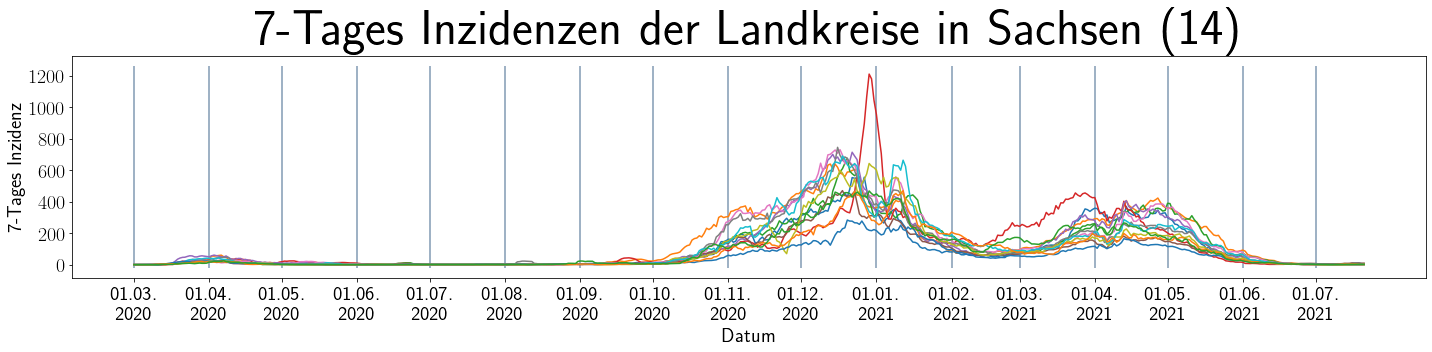

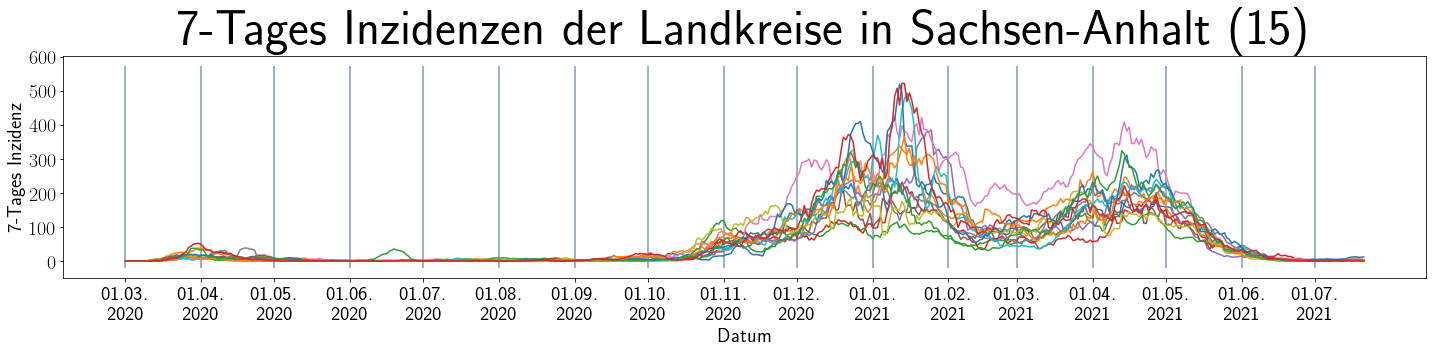

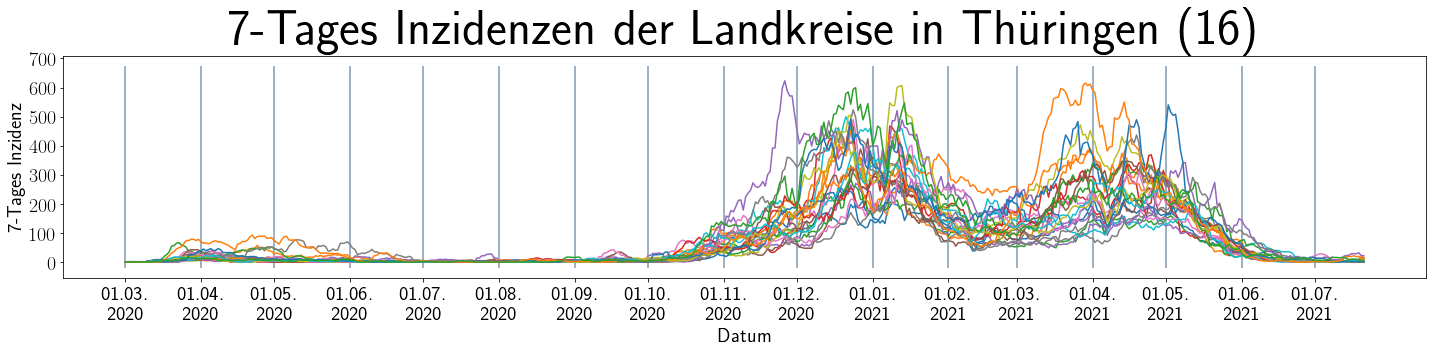

In [7]:
covid19_keys_copy = list(covid19.keys())
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # initiate and enlarge plot

    highest_incidence=0
    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data["unixtime"], county['incidences'])
            covid19_keys_copy.remove(AdmUnitID)
            if max(county['incidences'])> highest_incidence:
                highest_incidence = max(county['incidences'])

    plt.ylabel("7-Tages Inzidenz", fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Datum", fontsize=20)
    plt.xticks(firsts_of_month_unixtime, firsts_of_month_UTC,# rotation='vertical',
              fontsize=20)
    plt.vlines(firsts_of_month_unixtime, -20, highest_incidence+50, color=(0.5, 0.6, 0.7))
    plt.title("7-Tages Inzidenzen der Landkreise in {} ({})".format(state, stateID), fontsize=50)

    os.chdir(".."), os.chdir("..")    # move to correct directory
    # check if the needed directory is available - otherwise create it
    if not(os.path.isdir("results")): os.makedirs("results")
    os.chdir("results")    # move into result directory
    if not(os.path.isdir("Anhang")): os.makedirs("Anhang")
    plt.tight_layout()
    plt.savefig("Anhang/"+stateID+"_"+state+".png", facecolor="darkgrey")
    os.chdir(plot_incidences_directory)    # return to original directory

In [8]:
if len(covid19_keys_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_keys_copy:
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot Data of One State
The user can choose one federal state in the first cell below.
Afterwards the development of the seven days incidence of each county in the federal state is plotted.

In [9]:
state_ID = "13"
print("You have chosen {} {}.".format(state_ID, non_county_specific_data['states'][state_ID]))

You have chosen 13 Mecklenburg-Vorpommern.


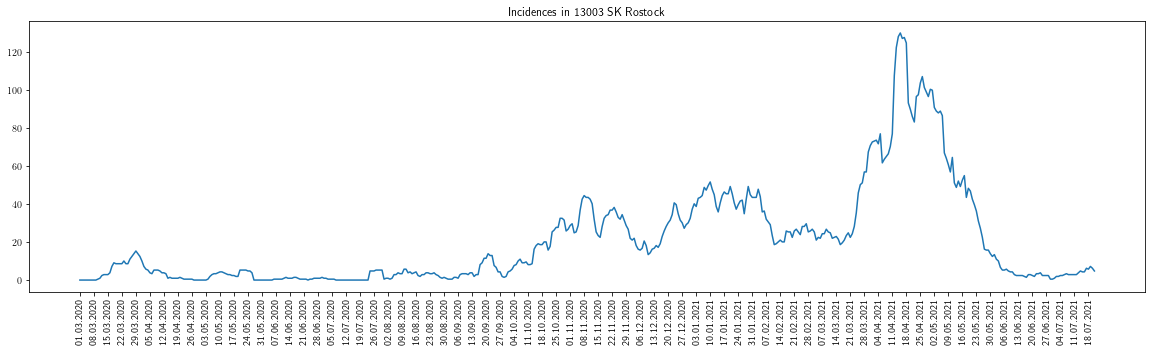

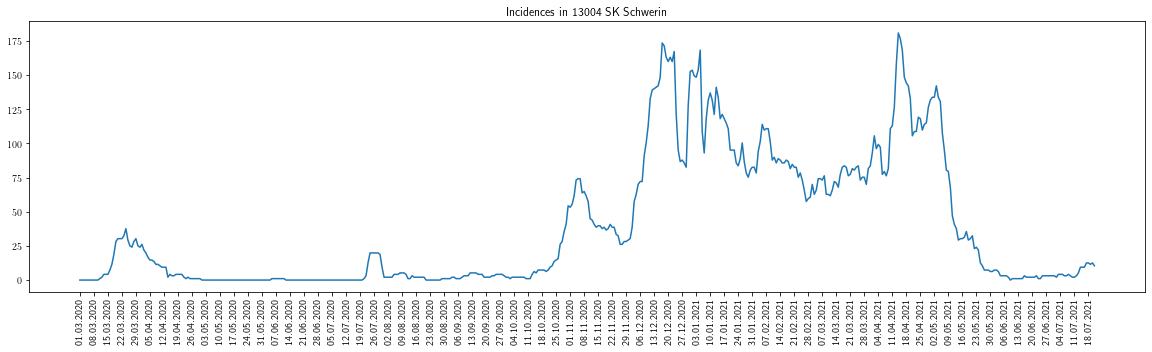

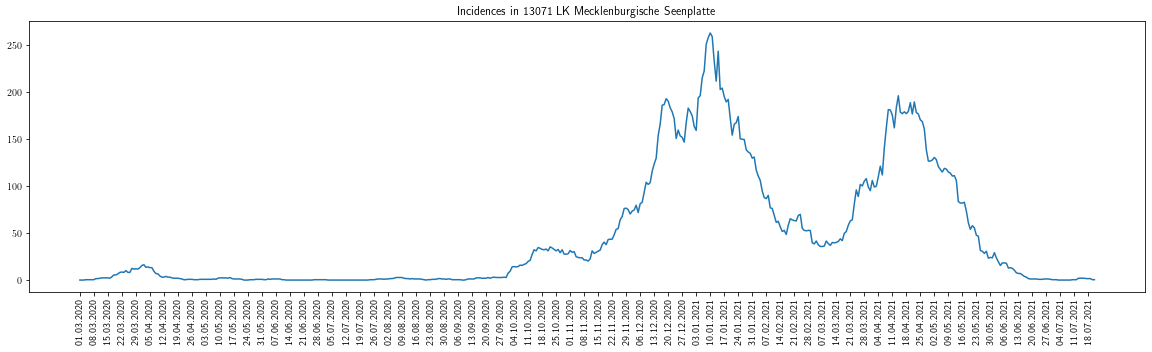

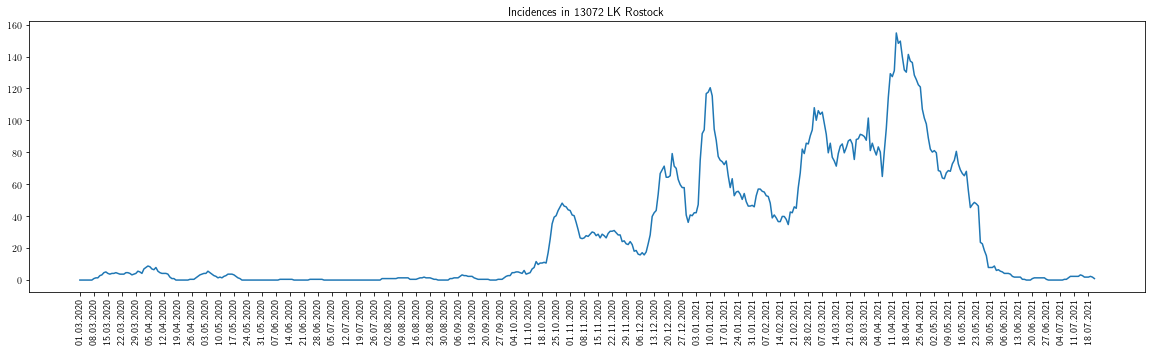

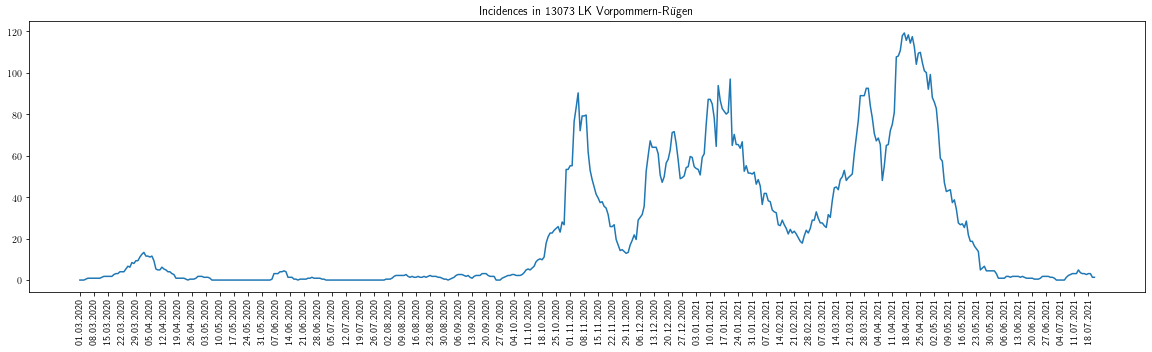

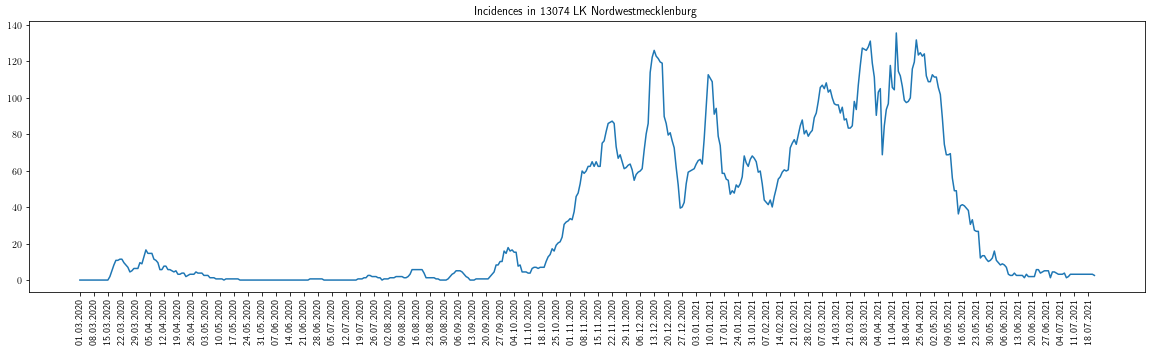

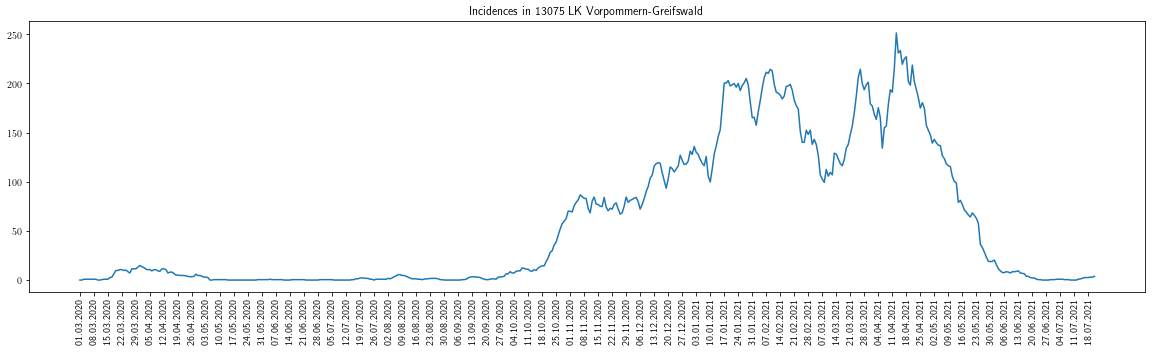

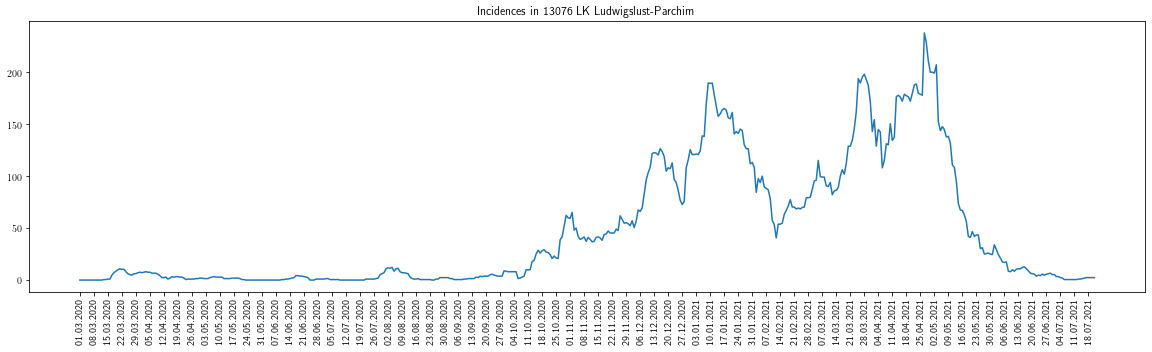

In [10]:
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == state_ID:
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.xticks(non_county_specific_data["unixtime"][::7],
                   non_county_specific_data['UTC'][::7], rotation='vertical')
        plt.plot(non_county_specific_data["unixtime"], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

## Plot the Incidence of Germany
The incidences of all counties are summed up and plotted over the time.

In [11]:
non_county_specific_data['UTC'][-1]

'21.07.2021'

In [12]:
months_german={"01":"Jan.", "02":"Feb.", "03":"März", "04":"April", "05":"Mai",
               "06":"Juni", "07":"Juli", "08":"Aug.", "09":"Sept.", "10":"Okt.",
               "11":"Nov.", "12":"Dez."}

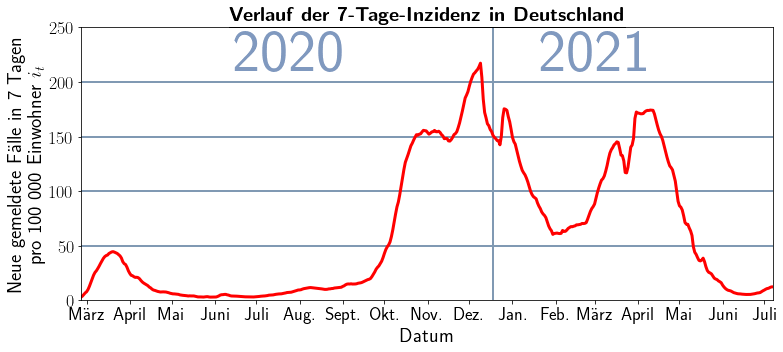

In [13]:
plt.figure(figsize=(11, 5))    # enlarge plot

plt.title(r"\textbf{\underline{Verlauf der 7-Tage-Inzidenz in Deutschland}}", fontsize=20)
plt.ylabel("Neue gemeldete Fälle in 7 Tagen\n" +
           r"pro 100 000 Einwohner $i_t$", fontsize=20)
plt.yticks(fontsize=18)
plt.ylim(0, 250)

plt.xlim(non_county_specific_data["unixtime"][10],
        non_county_specific_data["unixtime"][-1])

first_days_of_months = list()
middle_of_months_unix = list()
first_days_of_months_unix = list()
for date_index in range(len(non_county_specific_data['UTC'])):
    if non_county_specific_data['UTC'][date_index][:3] == "01.":
        first_days_of_months.append(non_county_specific_data['UTC'][date_index])
        first_days_of_months_unix.append(non_county_specific_data["unixtime"][date_index])
    if non_county_specific_data['UTC'][date_index][:3] == "15.":
        middle_of_months_unix.append(non_county_specific_data["unixtime"][date_index])
    if non_county_specific_data['UTC'][date_index] == "01.01.2021":
        new_year_date = non_county_specific_data["unixtime"][date_index]

plt.xticks(middle_of_months_unix,
           [months_german[e[3:5]] for e in first_days_of_months],
           fontsize=18)
plt.vlines(first_days_of_months_unix,0,-50)
plt.xlabel("Datum", fontsize=20)

plt.hlines([50,100,150,200], non_county_specific_data["unixtime"][0],
        non_county_specific_data["unixtime"][-1], color=(0.5, 0.6, 0.7), linewidth=2)
plt.vlines([new_year_date], 0, 250, color=(0.5, 0.6, 0.7), linewidth=2)

plt.text(non_county_specific_data["unixtime"][120], 210, "2020",
         fontweight=1000, fontsize=60, color=(0.5, 0.6, 0.75))

plt.text(non_county_specific_data["unixtime"][340], 210, "2021",
         fontweight=1000, fontsize=60, color=(0.5, 0.6, 0.75))
plt.plot(non_county_specific_data["unixtime"],
         non_county_specific_data['incidences_germany'], color="r", linewidth=3)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/vor_dem_Inhaltsverzeichniss")):
    os.makedirs("results/vor_dem_Inhaltsverzeichniss")
plt.tight_layout()
#plt.savefig("results/vor_dem_Inhaltsverzeichniss/Inzidenz_Deutschland.png")
os.chdir(plot_incidences_directory)    # return to original directory

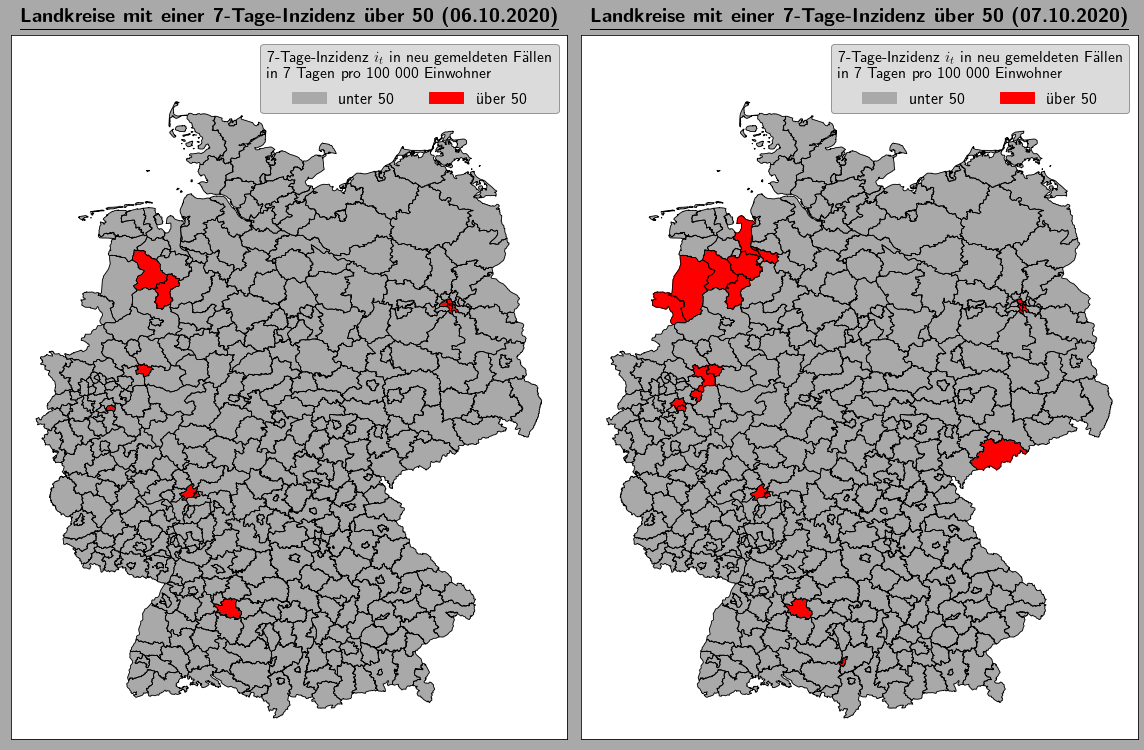

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (16, 10.5), facecolor='darkgrey')

plt.sca(ax[0])
plt.title(r"\underline{\textbf{Landkreise mit einer " +
          "7-Tage-Inzidenz über 50 (06.10.2020)}}", fontsize=20 , y=1.01)
plt.sca(ax[1])
plt.title(r"\underline{\textbf{Landkreise mit einer " +
          "7-Tage-Inzidenz über 50 (07.10.2020)}}", fontsize=20 , y=1.01)

ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

october6 = non_county_specific_data["UTC"].index("06.10.2020")
october7 = non_county_specific_data["UTC"].index("07.10.2020")

x, y = np.array(counties_geography["8311"]['geometry']).T
ax[0].fill(x, y, color="darkgrey", label="unter 50")
ax[1].fill(x, y, color="darkgrey", label="unter 50")
x, y = np.array(counties_geography["3453"]['geometry']).T
ax[0].fill(x, y, color="red", label="über 50")
ax[1].fill(x, y, color="red", label="über 50")
plt.sca(ax[0])
plt.legend(title="7-Tage-Inzidenz $i_t$ in neu gemeldeten Fällen\n" +
            "in 7 Tagen pro 100 000 Einwohner", title_fontsize=16, fontsize=17,
          loc="upper right", facecolor='lightgrey', edgecolor="grey", ncol=2)
plt.sca(ax[1])
plt.legend(title="7-Tage-Inzidenz $i_t$ in neu gemeldeten Fällen\n" +
            "in 7 Tagen pro 100 000 Einwohner", title_fontsize=16, fontsize=17,
          loc="upper right", facecolor='lightgrey', edgecolor="grey", ncol=2)


for AdmUnitId, county in covid19.items():
    color_october6, color_october7 = "darkgrey", "darkgrey"
    if county["incidences"][october6] > 50: color_october6 = "red"
    if county["incidences"][october7] > 50: color_october7 = "red"
    for polygon in counties_geography[AdmUnitId]['raw_geometry']:
        x, y = np.array(polygon).T
        ax[0].plot(x, y, color="black", linewidth=0.8)
        ax[1].plot(x, y, color="black", linewidth=0.8)
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x, y = np.array(polygon).T
        ax[0].fill(x, y, color=color_october6)
        ax[1].fill(x, y, color=color_october7)
ax[0].set_ylim(47,55.9)
ax[1].set_ylim(47,55.9)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Diskussion")): os.makedirs("results/Diskussion")
plt.tight_layout()
plt.savefig("results/Diskussion/Inzidenzen_uber_50_oktober_2020.png",
            facecolor="darkgrey")
os.chdir(plot_incidences_directory)    # return to original directory

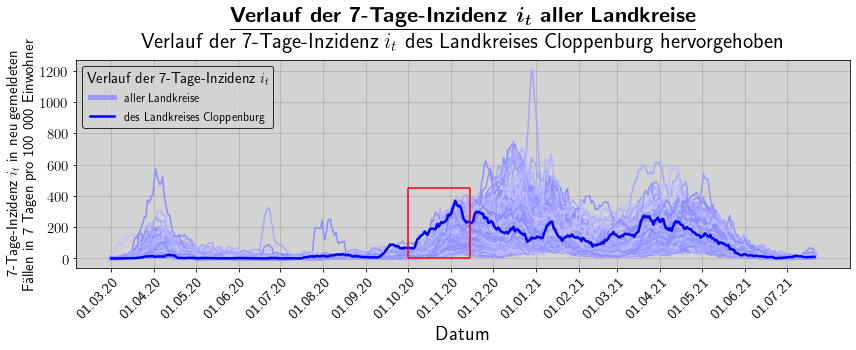

In [15]:
__, ax = plt.subplots(figsize=(12, 5))
ax.set_facecolor('lightgrey')
plt.title(r"\textbf{\underline{Verlauf der 7-Tage-Inzidenz "+
          r"$\boldsymbol{i_t}$ aller Landkreise}}" + "\n"
          r"Verlauf der 7-Tage-Inzidenz $i_t$ des " +
          r"Landkreises Cloppenburg hervorgehoben",
         fontsize=22, y=1.03, usetex=True)

plt.xlabel("Datum", fontsize=20)
plt.xticks(first_days_of_months_unix,
           [e[:-4] + e[-2:] for e in first_days_of_months], fontsize=15,
           rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel(r"7-Tage-Inzidenz $i_t$ in neu gemeldeten" +
                "\nFällen in 7 Tagen pro 100 000 Einwohner", fontsize=15)
plt.yticks(fontsize=15)

i=0
# for legend
plt.plot(non_county_specific_data["unixtime"], covid19["8311"]["incidences"],
         color=(0.6,0.6,1), linewidth=5, label="aller Landkreise")
colors=[(0.55,0.55,1), (0.6,0.6,1), (0.65,0.65,1), (0.7,0.7,1),
        (0.75,0.75,1), (0.8,0.8,1), (0.85,0.85,1)]
for AdmUnitId, county in covid19.items():
    plt.plot(non_county_specific_data["unixtime"], county["incidences"],
             color=colors[i%5])
    i+=1

    
plt.plot(non_county_specific_data["unixtime"],
         covid19["3453"]["incidences"], color="blue", linewidth=2.5,
        label="des Landkreises Cloppenburg")
plt.legend(title=r"Verlauf der 7-Tage-Inzidenz $i_t$", title_fontsize=15, fontsize=12,
           loc="upper left", facecolor='lightgrey', edgecolor="black")
plt.grid()
plt.vlines([1601503200000,1605394800000], 0, 450, color="red", zorder=5)
plt.hlines([0, 450], 1601503200000,1605394800000, color="red", zorder=5)
os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Diskussion")): os.makedirs("results/Diskussion")
plt.tight_layout()
plt.savefig("results/Diskussion/Inzidenz_Cloppenburg.png", facecolor="darkgrey")
os.chdir(plot_incidences_directory)    # return to original directory

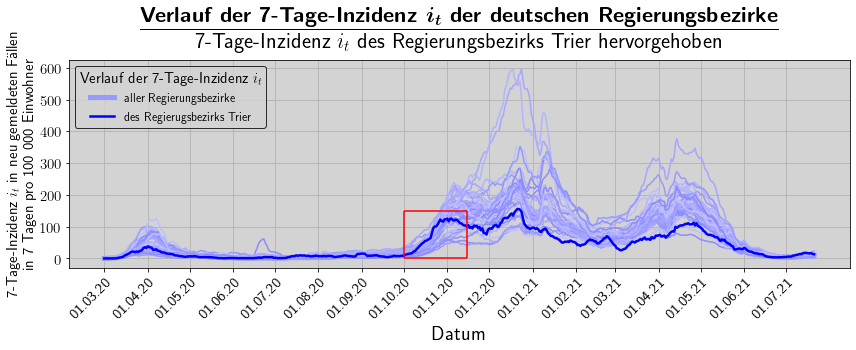

In [16]:
__, ax = plt.subplots(figsize=(12, 5))
ax.set_facecolor('lightgrey')
plt.title(r"\textbf{\underline{Verlauf der 7-Tage-Inzidenz $\boldsymbol{i_t}$ " +
          "der deutschen Regierungsbezirke}}" +
          "\n7-Tage-Inzidenz $i_t$ des Regierungsbezirks Trier hervorgehoben",
         fontsize=22, y=1.03, usetex=True)

plt.xlabel("Datum", fontsize=20)
plt.xticks(first_days_of_months_unix,
           [e[:-4] + e[-2:] for e in first_days_of_months], fontsize=15,
           rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel(r"7-Tage-Inzidenz $i_t$ in neu gemeldeten Fällen" +
                "\nin 7 Tagen pro 100 000 Einwohner", fontsize=15)
plt.yticks(fontsize=15)

i=0
# for legend
plt.plot(non_county_specific_data["unixtime"], districts["83"]["incidences"],
         color=(0.6,0.6,1), linewidth=5, label="aller Regierungsbezirke")
colors=[(0.55,0.55,1), (0.6,0.6,1), (0.65,0.65,1), (0.7,0.7,1),
        (0.75,0.75,1), (0.8,0.8,1), (0.85,0.85,1)]
for district in districts.values():
    plt.plot(non_county_specific_data["unixtime"], district["incidences"],
             color=colors[i%5])
    i+=1
plt.plot(non_county_specific_data["unixtime"],
         districts["72"]["incidences"], color="blue", linewidth=2.5,
         label="des Regierugsbezirks Trier")

plt.legend(title=r"Verlauf der 7-Tage-Inzidenz $i_t$", title_fontsize=15, fontsize=12,
           loc="upper left", facecolor='lightgrey', edgecolor="black")
plt.vlines([1601503200000,1605394800000], 0, 150, color="red", zorder=5)
plt.hlines([0, 150], 1601503200000,1605394800000, color="red", zorder=5)
plt.grid()
os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Diskussion")): os.makedirs("results/Diskussion")
plt.tight_layout()
plt.savefig("results/Diskussion/Inzidenz_Trier.png", facecolor="darkgrey")
os.chdir(plot_incidences_directory)    # return to original directory

In [17]:
def get_week_day(UTC):
    if(UTC == 0): return "Sonntag"
    if(UTC == 1): return "Montag"
    if(UTC == 2): return "Dienstag"
    if(UTC == 3): return "Mittwoch"
    if(UTC == 4): return "Donnerstag"
    if(UTC == 5): return "Freitag"
    if(UTC == 6): return "Samstag"
    else: return "Invalid day"

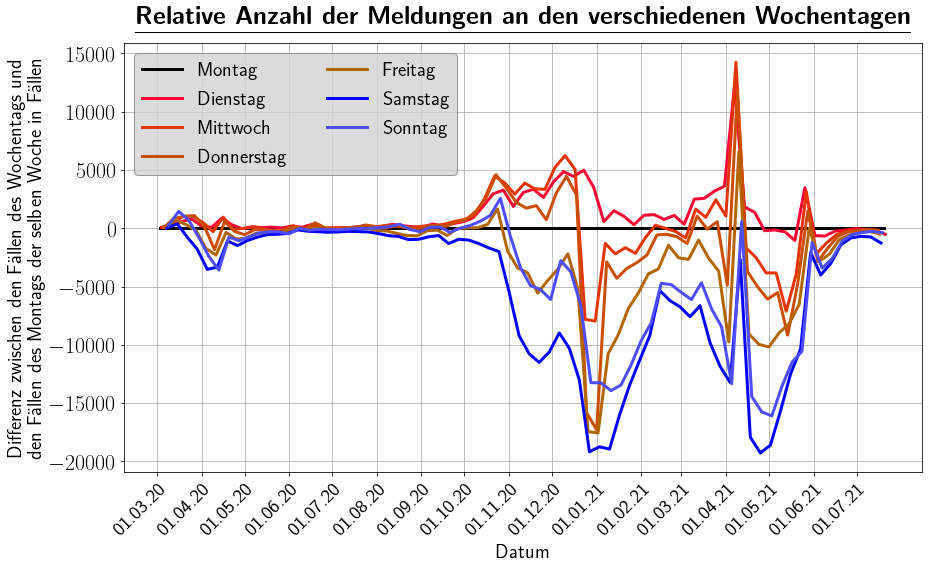

In [18]:
plt.figure(figsize=(13, 8))    # enlarge plot
plt.xticks(first_days_of_months_unix,
           [e[:-4] + e[-2:] for e in first_days_of_months], fontsize=20,
           rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Datum", fontsize=20)
plt.yticks(fontsize=22)
plt.ylabel("Differenz zwischen den Fällen des Wochentags und\n" +
           "den Fällen des Montags der selben Woche in Fällen", fontsize=20)
plt.title(r"\textbf{\underline{Relative Anzahl der Meldungen}}"+
          r"\textbf{\underline{ an den verschiedenen Wochentagen}}",
          fontsize=25, y=1.03, usetex=True)
plt.grid()
cases = non_county_specific_data["cases_germany"]
color_scheme = [10,10,(0,0,0),(1,0,0.2),(0.9,0.2,0),(0.8,0.3,0),
                (0.7,0.4,0),(0,0,1),(0.3,0.3,1)]
for day in [2,3,4,5,6,7,8]:
    y_axis = non_county_specific_data["unixtime"][day::7]
    plt.plot(y_axis, [cases[day::7][i] - cases[day-1::7][i] -
             (cases[2::7][i] - cases[1::7][i]) for i in range(len(y_axis))],
             label=get_week_day(datetime.date.fromtimestamp(y_axis[0] //1000).weekday()),
             linewidth=3, color = color_scheme[day])
plt.legend(ncol=2, fontsize=20, facecolor='lightgrey', edgecolor="grey")

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/neue_Fälle_pro_Wochentag_Deutschland.png")
os.chdir(plot_incidences_directory)    # return to original directory

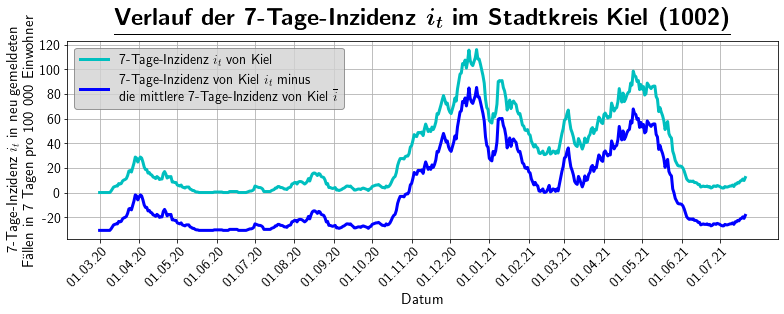

In [19]:
plt.figure(figsize=(11, 4.5))    # enlarge plot
plt.xticks(first_days_of_months_unix,
           [e[:-4] + e[-2:] for e in first_days_of_months], fontsize=14,
           rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Datum", fontsize=15)
plt.yticks([-40,-20,0,20,40,60,80,100,120,140],
           [-40,-20,0,20,40,60,80,100,120,140], fontsize=14)
plt.ylabel(r"7-Tage-Inzidenz $i_t$ in neu gemeldeten" +
                "\nFällen in 7 Tagen pro 100 000 Einwohner", fontsize=15)
plt.title(r"\textbf{\underline{Verlauf der 7-Tage-Inzidenz "+
          r"$\boldsymbol{i_t}$ im Stadtkreis Kiel (1002)}}",
          fontsize=24, y=1.05, usetex=True)
plt.grid()

plt.plot(non_county_specific_data["unixtime"], covid19["1002"]["incidences"],
         color="c", linewidth=3, label=r"7-Tage-Inzidenz $i_t$ von Kiel")
plt.plot(non_county_specific_data["unixtime"], covid19["1002"]["incidences_scaled"],
         color="blue", linewidth=3,
         label=r"7-Tage-Inzidenz von Kiel $i_t$ minus"+"\n"+
         r"die mittlere 7-Tage-Inzidenz von Kiel $\overline{i}$")
plt.legend(fontsize=14, facecolor='lightgrey', edgecolor="grey")
#plt.ylim(-40,140)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/Inzidenz_Kiel.png")
os.chdir(plot_incidences_directory)    # return to original directory

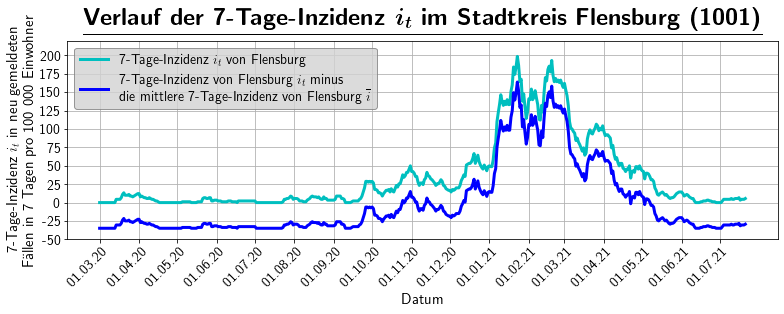

In [20]:
plt.figure(figsize=(11, 4.5))    # enlarge plot
plt.xticks(first_days_of_months_unix,
           [e[:-4] + e[-2:] for e in first_days_of_months], fontsize=14,
           rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Datum", fontsize=15)
plt.yticks([-50,-25,0,25,50,75,100,125,150,175,200],
           [-50,-25,0,25,50,75,100,125,150,175,200],
           fontsize=14)
plt.ylabel(r"7-Tage-Inzidenz $i_t$ in neu gemeldeten" +
                "\nFällen in 7 Tagen pro 100 000 Einwohner", fontsize=15)
plt.title(r"\textbf{\underline{Verlauf der 7-Tage-Inzidenz  $\boldsymbol{i_t}$ " +
          "im Stadtkreis Flensburg (1001)}}",
          fontsize=24, y=1.05, usetex=True)
plt.grid()

plt.plot(non_county_specific_data["unixtime"],
         covid19["1001"]["incidences"], color="c", linewidth=3,
         label=r"7-Tage-Inzidenz $i_t$ von Flensburg")
plt.plot(non_county_specific_data["unixtime"],
         covid19["1001"]["incidences_scaled"], color="blue", linewidth=3,
         label=r"7-Tage-Inzidenz von Flensburg $i_t$ minus"+"\n"+
         r"die mittlere 7-Tage-Inzidenz von Flensburg $\overline{i}$")
plt.legend(fontsize=14, facecolor='lightgrey', edgecolor="grey")
plt.ylim(-50,220)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/Inzidenz_Flensburg.png")
os.chdir(plot_incidences_directory)    # return to original directory

In [21]:
input_array1_scaled = covid19["1001"]["incidences_scaled"]
input_array2_scaled = covid19["1002"]["incidences_scaled"]

input_array1, input_array2 = covid19["1001"]["incidences"], covid19["1002"]["incidences"]
position_array2_to_array1 = ([e for e in range(-len(input_array1)+1, len(input_array1))])
number_of_products = ([e for e in range(1, len(input_array1))] +
                      [e for e in range(len(input_array1), 0, -1)])

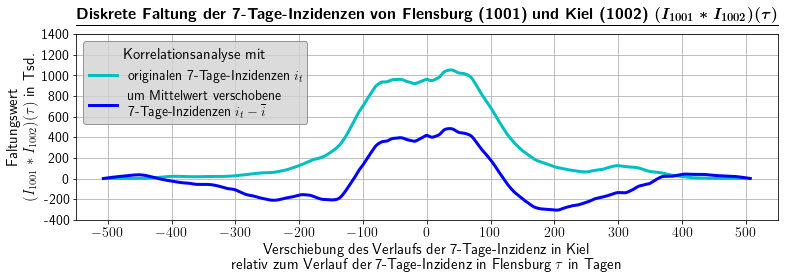

In [30]:
plt.figure(figsize=(11, 4))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=14)
plt.xlabel("Verschiebung des Verlaufs der 7-Tage-Inzidenz in Kiel\n"+
           r"relativ zum Verlauf der 7-Tage-Inzidenz in Flensburg $\tau$ in Tagen",
           fontsize=15)
plt.yticks([-400000,-200000,0,200000,400000,600000,800000,1000000,1200000,1400000],
           [-400,-200,0,200,400,600,800,1000,1200,1400],
           fontsize=14)
plt.ylabel("Faltungswert\n"+
    r"$(I_{1001}\ast I_{1002})(\tau)$ in Tsd.", fontsize=15)
plt.title(r"\textbf{\underline{Diskrete Faltung der 7-Tage-Inzidenzen " +
          r"von Flensburg (1001) und Kiel (1002) " 
          r"$\boldsymbol{(I_{1001}\ast I_{1002})(\tau)}$}}",
          fontsize=16, y=1.05, usetex=True)
plt.grid()

convolution = np.correlate(input_array1, input_array2, mode="full")
plt.plot(position_array2_to_array1, convolution, color="c", linewidth=3,
         label=r"originalen 7-Tage-Inzidenzen $i_t$")

convolution_scaled = np.correlate(input_array1_scaled, input_array2_scaled, mode="full")
plt.plot(position_array2_to_array1, convolution_scaled, color="blue", linewidth=3,
         label="um Mittelwert verschobene\n" +
         r"7-Tage-Inzidenzen $i_t-\overline{i}$")

plt.legend(title="Korrelationsanalyse mit", title_fontsize=15,
           loc='upper left', fontsize=14, facecolor='lightgrey', edgecolor="grey")
plt.xlim(-550,550)
plt.ylim(-400000,1400000)
os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/correlation_Flensburg_Kiel.png")
os.chdir(plot_incidences_directory)    # return to original directory

In [23]:
correlation = [convolution [i]/number_of_products[i] for i in range(len(convolution ))]
correlation_scaled = [convolution_scaled[i]/number_of_products[i]
                      for i in range(len(convolution_scaled))]

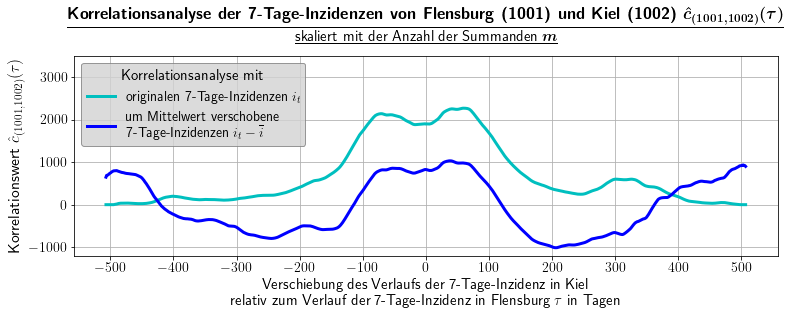

In [24]:
plt.figure(figsize=(11, 4.5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=14)
plt.xlabel("Verschiebung des Verlaufs der 7-Tage-Inzidenz in Kiel\n"+
           r"relativ zum Verlauf der 7-Tage-Inzidenz in Flensburg $\tau$ in Tagen",
           fontsize=15)
plt.ylabel(r"Korrelationswert $\hat{c}_{(1001, 1002)}(\tau)$", fontsize=16)
plt.yticks(fontsize=14)
plt.title(r"\textbf{\underline{Korrelationsanalyse der 7-Tage-Inzidenzen "+
          r"von Flensburg (1001) und Kiel (1002) "+
          r"$\boldsymbol{\hat{c}_{(1001, 1002)}(\tau)}$}}" +
          "\n" + r"\underline{\fontsize{15pt}{3em}\selectfont{}{" +
          r"skaliert mit der Anzahl der Summanden $\boldsymbol{m}$}}",
          fontsize=16.5, y=1.04, usetex=True)
plt.grid()

plt.plot(position_array2_to_array1, correlation, color="c", linewidth=3,
         label="originalen 7-Tage-Inzidenzen $i_t$")

plt.plot(position_array2_to_array1, correlation_scaled,
         color="blue", linewidth=3,
         label="um Mittelwert verschobene\n7-Tage-Inzidenzen  $i_t-\overline{i}$")

plt.legend(title="Korrelationsanalyse mit", title_fontsize=15,
           loc='upper left', fontsize=14, facecolor='lightgrey', edgecolor="grey")
plt.ylim(-1200,3500)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/correlation_Flensburg_Kiel_scaled_autocorrelation.png")
os.chdir(plot_incidences_directory)    # return to original directory

In [25]:
autocor_a1 = np.correlate(input_array1, input_array1)/len(input_array1)
autocor_a2 = np.correlate(input_array2,input_array2)/len(input_array2)
complete_correlation = [e/math.sqrt(autocor_a2*autocor_a1) for e in correlation]

autocor_a1_scaled = (np.correlate(
    input_array1_scaled, input_array1_scaled)/len(input_array1_scaled))
autocor_a2_scaled = (np.correlate(
    input_array2_scaled, input_array2_scaled)/len(input_array2_scaled))
complete_correlation_scaled = [
    e/math.sqrt(autocor_a2_scaled*autocor_a1_scaled) for e in correlation_scaled]

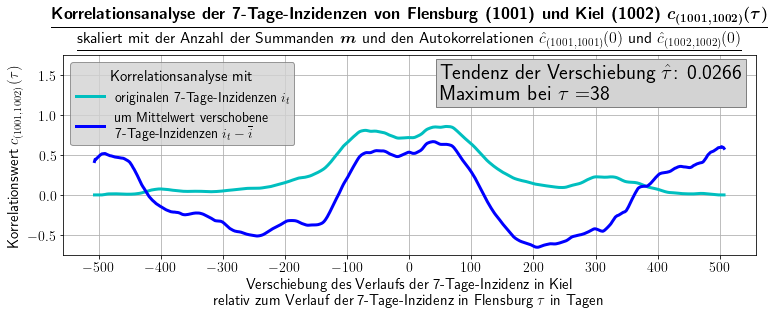

In [26]:
plt.figure(figsize=(11, 4.5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=14)
plt.xlabel("Verschiebung des Verlaufs der 7-Tage-Inzidenz in Kiel\n"+
           r"relativ zum Verlauf der 7-Tage-Inzidenz in Flensburg $\tau$ in Tagen",
           fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel(r"Korrelationswert $c_{(1001,1002)}(\tau)$", fontsize=15)
plt.title(r"\textbf{\underline{Korrelationsanalyse der 7-Tage-Inzidenzen "+
          r"von Flensburg (1001) und Kiel (1002) "+
          r"$\boldsymbol{c_{(1001, 1002)}(\tau)}$}}" +
          "\n" + r"\underline{\fontsize{16pt}{3em}\selectfont{}{skaliert mit der " +
          r"Anzahl der Summanden $\boldsymbol{m}$ und den Autokorrelationen "+
          r"$\hat{c}_{(1001,1001)}(0)$ und $\hat{c}_{(1002,1002)}(0)$}}",
          fontsize=16.5, y=1.04, usetex=True)
plt.grid()

plt.plot(position_array2_to_array1, complete_correlation, color="c", linewidth=3,
         label="originalen 7-Tage-Inzidenzen $i_t$")
plt.plot(position_array2_to_array1, complete_correlation_scaled, linewidth=3,
         color="blue",
         label="um Mittelwert verschobene\n7-Tage-Inzidenzen  $i_t-\overline{i}$")

lcs = len(complete_correlation_scaled)//2
shift_trend = (-sum(complete_correlation_scaled[:lcs]) +
               sum(complete_correlation_scaled[lcs+1:]))/lcs
maximum = str(np.argmax(complete_correlation_scaled) - lcs)
plt.text(50, 1.2, r"Tendenz der Verschiebung $\hat{\tau}$: " + 
         str(shift_trend)[:6] +
         "\n" + r"Maximum bei $\tau = $" + maximum,
         usetex=True, fontsize=21,
         bbox=dict(facecolor='lightgrey', edgecolor="grey"))

plt.ylim(-0.75, 1.75)
plt.legend(title="Korrelationsanalyse mit", loc='upper left',
           title_fontsize=15, fontsize=14, facecolor='lightgrey', edgecolor="grey")

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/correlation_Flensburg_Kiel_scaled_complete.png")
os.chdir(plot_incidences_directory)    # return to original directory

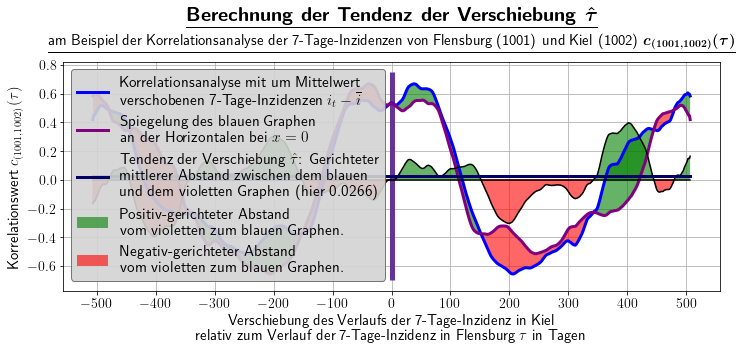

In [27]:
plt.figure(figsize=(10.2,5))    # enlarge plot
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], fontsize=14)
plt.xlabel("Verschiebung des Verlaufs der 7-Tage-Inzidenz in Kiel\n"+
           r"relativ zum Verlauf der 7-Tage-Inzidenz in Flensburg $\tau$ in Tagen",
           fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel(r"Korrelationswert $c_{(1001,1002)}(\tau)$", fontsize=15)
plt.title(r"\textbf{\underline{Berechnung der Tendenz der Verschiebung " +
          r"$\boldsymbol{\hat{\tau}}$}}"
          + "\n"
          r"\underline{\fontsize{15pt}{3em}\selectfont{}{am Beispiel der " +
          r"Korrelationsanalyse der 7-Tage-Inzidenzen von Flensburg" +
          r" (1001) und Kiel (1002) $\boldsymbol{c_{(1001,1002)}(\tau)}$}}",
          fontsize=20, y=1.05, usetex=True)

x=position_array2_to_array1
y1=complete_correlation_scaled
plt.plot(x, y1, color="blue", linewidth=3, zorder=4,
         label="Korrelationsanalyse mit um Mittelwert\n"+
         r"verschobenen 7-Tage-Inzidenzen $i_t-\overline{i}$")
lcs = len(complete_correlation_scaled)//2
y2=complete_correlation_scaled[::-1]
plt.plot(x, y2, color="purple", linewidth=3, zorder=4,
         label="Spiegelung des blauen Graphen\n" + r"an der Horizontalen bei $x=0$")


colors = list()
for i in range(len(y2)):
    if y1[i] > y2[i]: colors.append(True)
    else: colors.append(False)
notcolors = [not(e) for e in colors]
        
plt.fill_between(x, y1, y2, where=colors, facecolor='green',
                 alpha=0.6, zorder=3,
                  label="Positiv-gerichteter Abstand\n"+
                        "vom violetten zum blauen Graphen.")
plt.fill_between(x, y1, y2, where=notcolors, facecolor='red',
                 alpha=0.6, zorder=3,
                  label="Negativ-gerichteter Abstand\n"+
                        "vom violetten zum blauen Graphen.")


plt.plot(x, [y1[i] - y2[i] for i in range(len(y2))],
         color="black", zorder=4)
plt.fill_between(x, 0, [y1[i] - y2[i] for i in range(len(y2))],
                 where=notcolors, facecolor='red',
                 alpha=0.6, zorder=3, edgecolor="red")
plt.fill_between(x, 0, [y1[i] - y2[i] for i in range(len(y2))],
                 where=colors, facecolor='green', alpha=0.6, zorder=3)

shift_trend = (-sum(complete_correlation_scaled[:lcs]) +
               sum(complete_correlation_scaled[lcs+1:]))/lcs
plt.plot(x, [shift_trend for e in range(len(x))],
         color=(0,0,0.4), zorder=4, linewidth=3,
        label=(r"Tendenz der Verschiebung $\hat{\tau}$: Gerichteter"+
               "\nmittlerer Abstand zwischen dem blauen\n"+
               "und dem violetten Graphen (hier 0.0266)"))

plt.grid()
plt.plot(x, [0 for e in range(len(x))], color="black", zorder=4)
plt.vlines([0],-0.7, 0.75, color="rebeccapurple", linewidth=5)
plt.legend(loc='upper left', fontsize=15.5, facecolor='lightgrey', edgecolor="dimgrey",
          fancybox=True, framealpha=0.91)

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Grundlagen")): os.makedirs("results/Grundlagen")
plt.tight_layout()
plt.savefig("results/Grundlagen/correlation_Flensburg_Kiel_Verschiebung_Tendenz.png")
os.chdir(plot_incidences_directory)    # return to original directory